In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Check available styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [7]:
# Use one of the seaborn styles listed
plt.style.use('seaborn-v0_8-darkgrid')  # or any other seaborn-v0_8 style you prefer

In [9]:
# Sets seaborn's default styling for your plots
sns.set_palette("husl")

In [11]:
# Read the CSV file
df = pd.read_csv('data.csv')

In [13]:
# Preprocessing: Replace height values with random numbers between 150 and 180
df['Height'] = np.random.uniform(150, 180, size=len(df))

In [15]:
# 1. Team Distribution Analysis
def analyze_team_distribution():
    team_dist = df['Team'].value_counts()
    team_percentages = (team_dist / len(df) * 100).round(2)

    plt.figure(figsize=(12, 6))
    team_percentages.plot(kind='bar')
    plt.title('Employee Distribution Across Teams')
    plt.xlabel('Team')
    plt.ylabel('Percentage of Employees')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return team_percentages

In [17]:
# 2. Position Analysis
def analyze_positions():
    position_dist = df['Position'].value_counts()

    plt.figure(figsize=(10, 6))
    position_dist.plot(kind='pie', autopct='%1.1f%%')
    plt.title('Employee Distribution by Position')
    plt.axis('equal')
    plt.show()

    return position_dist

In [19]:
# 3. Age Group Analysis
def analyze_age_groups():
    df['Age_Group'] = pd.cut(df['Age'],
                             bins=[0, 25, 30, 35, 40, 100],
                             labels=['<25', '25-30', '31-35', '36-40', '>40'])

    age_dist = df['Age_Group'].value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    age_dist.plot(kind='bar')
    plt.title('Age Distribution of Employees')
    plt.xlabel('Age Group')
    plt.ylabel('Number of Employees')
    plt.tight_layout()
    plt.show()

    return df['Age_Group'].mode()[0]

In [21]:
# 4. Salary Analysis by Team and Position
def analyze_salary_expenditure():
    team_salary = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)
    position_salary = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    team_salary.plot(kind='bar', ax=ax1)
    ax1.set_title('Total Salary Expenditure by Team')
    ax1.set_xlabel('Team')
    ax1.set_ylabel('Total Salary ($)')
    ax1.tick_params(axis='x', rotation=45)

    position_salary.plot(kind='bar', ax=ax2)
    ax2.set_title('Total Salary Expenditure by Position')
    ax2.set_xlabel('Position')
    ax2.set_ylabel('Total Salary ($)')
    ax2.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    return team_salary.head(1), position_salary.head(1)

In [23]:
# 5. Age-Salary Correlation Analysis
def analyze_age_salary_correlation():
    correlation = stats.pearsonr(df['Age'], df['Salary'])[0]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Age', y='Salary')
    plt.title(f'Age vs Salary Correlation (r = {correlation:.2f})')
    plt.xlabel('Age')
    plt.ylabel('Salary ($)')
    plt.tight_layout()
    plt.show()

    return correlation

In [25]:
# Main analysis execution
def main():
    print("1. Team Distribution Analysis:")
    team_percentages = analyze_team_distribution()
    print("\nTeam Distribution Percentages:")
    print(team_percentages)

    print("\n2. Position Analysis:")
    position_dist = analyze_positions()
    print("\nPosition Distribution:")
    print(position_dist)

    print("\n3. Age Group Analysis:")
    predominant_age_group = analyze_age_groups()
    print(f"\nPredominant Age Group: {predominant_age_group}")

    print("\n4. Salary Expenditure Analysis:")
    team_salary, position_salary = analyze_salary_expenditure()
    print("\nHighest Salary Expenditure:")
    print(f"Team: {team_salary}")
    print(f"Position: {position_salary}")

    print("\n5. Age-Salary Correlation Analysis:")
    correlation = analyze_age_salary_correlation()
    print(f"\nCorrelation coefficient between Age and Salary: {correlation:.2f}")

In [29]:
import pandas as pd
import numpy as np
from scipy import stats

def analyze_age_salary_correlation():
    # Remove rows with NaN or infinite values
    df_cleaned = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['Age', 'Salary'])
    
    # Now calculate the correlation
    correlation = stats.pearsonr(df_cleaned['Age'], df_cleaned['Salary'])[0]
    
    return correlation


1. Team Distribution Analysis:


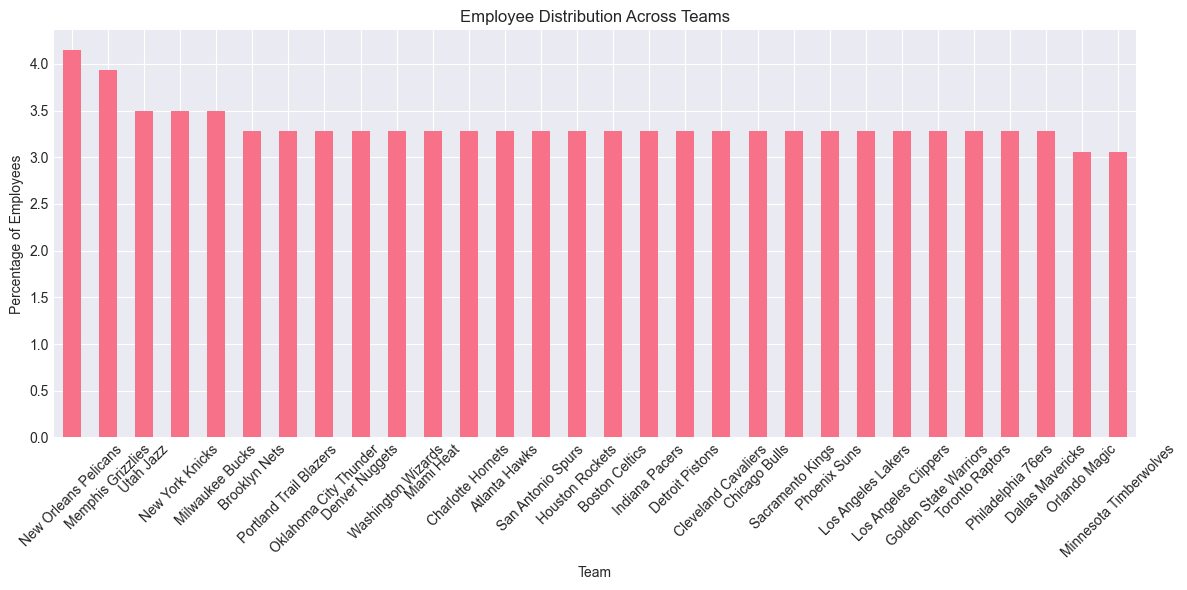


Team Distribution Percentages:
Team
New Orleans Pelicans      4.15
Memphis Grizzlies         3.93
Utah Jazz                 3.49
New York Knicks           3.49
Milwaukee Bucks           3.49
Brooklyn Nets             3.28
Portland Trail Blazers    3.28
Oklahoma City Thunder     3.28
Denver Nuggets            3.28
Washington Wizards        3.28
Miami Heat                3.28
Charlotte Hornets         3.28
Atlanta Hawks             3.28
San Antonio Spurs         3.28
Houston Rockets           3.28
Boston Celtics            3.28
Indiana Pacers            3.28
Detroit Pistons           3.28
Cleveland Cavaliers       3.28
Chicago Bulls             3.28
Sacramento Kings          3.28
Phoenix Suns              3.28
Los Angeles Lakers        3.28
Los Angeles Clippers      3.28
Golden State Warriors     3.28
Toronto Raptors           3.28
Philadelphia 76ers        3.28
Dallas Mavericks          3.28
Orlando Magic             3.06
Minnesota Timberwolves    3.06
Name: count, dtype: float64

2. P

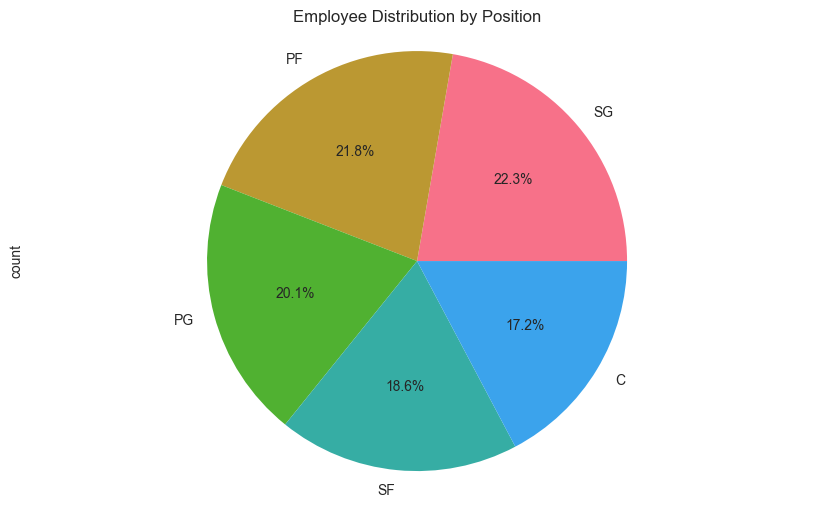


Position Distribution:
Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

3. Age Group Analysis:


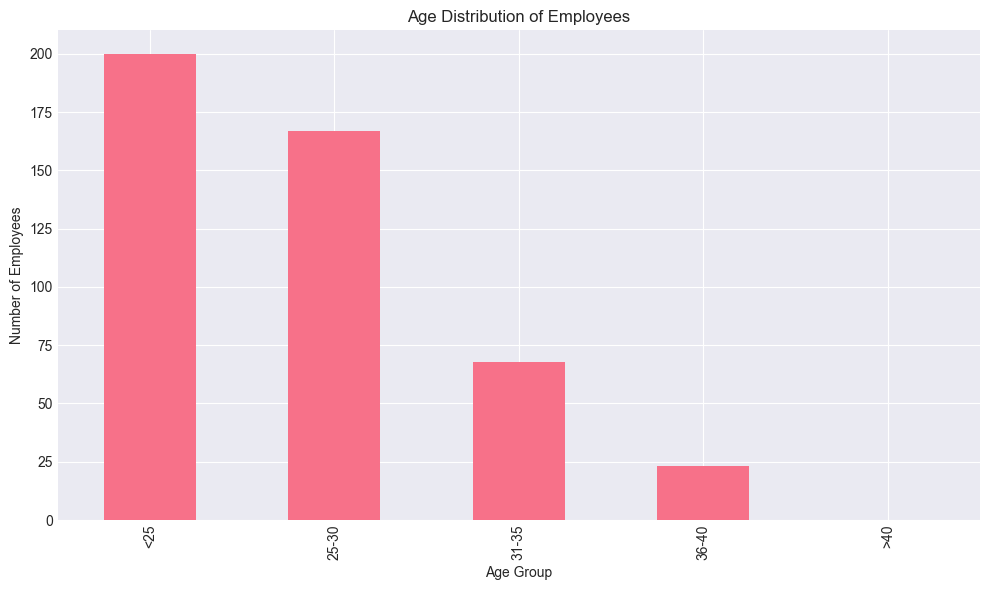


Predominant Age Group: <25

4. Salary Expenditure Analysis:


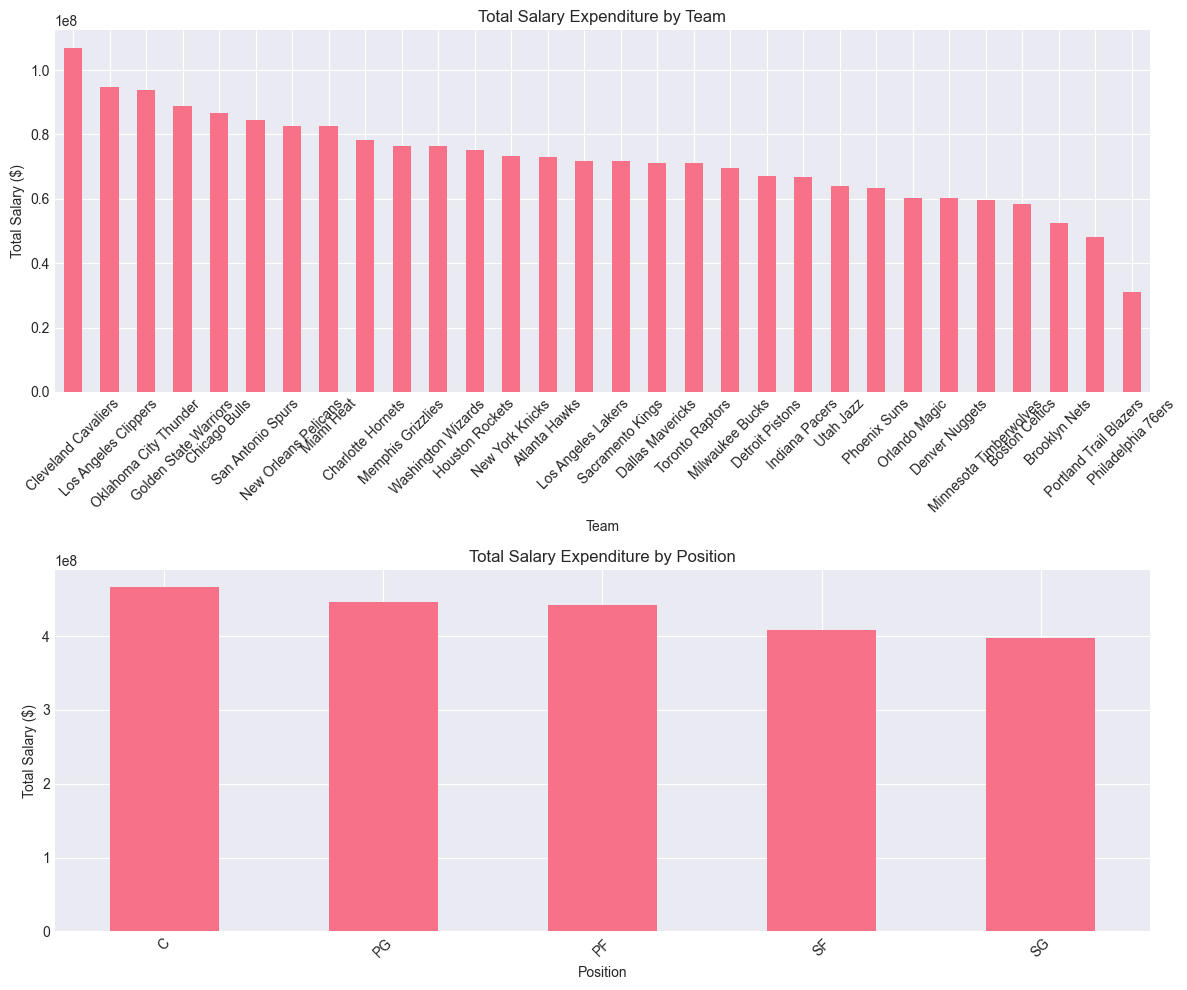


Highest Salary Expenditure:
Team: Team
Cleveland Cavaliers    106988689.0
Name: Salary, dtype: float64
Position: Position
C    466377332.0
Name: Salary, dtype: float64

5. Age-Salary Correlation Analysis:

Correlation coefficient between Age and Salary: 0.21


In [31]:
if __name__ == "__main__":
    main()